In [4]:
""" import useful functions """

import matplotlib.pyplot as plt 
import pyccl as ccl
import numpy as np
import scipy
%matplotlib inline

In [18]:
""" define functions """

# Equation 2.14
def Omega_Lambda(cosmo):
    Omega_c , Omega_b , Omega_k , Omega_r, alpha_tilde, C_t = cosmo
    Omega_m = Omega_c + Omega_b
    
    return 1 - Omega_m - Omega_r - Omega_k + alpha_tilde * (1 - C_t**2 + Omega_k**2 - 2*Omega_k)

# Equation 2.13
def X(z, cosmo):
    
    Omega_c , Omega_b , Omega_k , Omega_r, alpha_tilde, C_t = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = Omega_Lambda(cosmo)
    
    return 1 + 4 * alpha_tilde * (Omega_m * (1 + z) ** 3 + (Omega_r + alpha_tilde*C_t**2) * (1 + z)** 4 + Omega_lambda)

# Equation 2.12
def E(z , cosmo):
    
    Omega_c , Omega_b , Omega_k , Omega_r, alpha_tilde, C_t = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = Omega_Lambda(cosmo)
    
    if alpha_tilde == 0:
        ans = np.sqrt(Omega_m * (1 + z) ** 3 + Omega_r * (1 + z) ** 4 + Omega_k * (1 + z) ** 2 + Omega_lambda)
    else:
        ans = np.sqrt((np.sqrt(X(z , cosmo)) - 1 + (2 * alpha_tilde * Omega_k * (1+z) ** 2))/(2 * alpha_tilde))
    
    return ans

# gives dE/dz

def dEdz(z , cosmo):
    
    Omega_c , Omega_b , Omega_k , Omega_r, alpha_tilde, C_t = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = Omega_Lambda(cosmo)
    
    # Wang and Mota
    dEdz = Omega_k *(1 + z)/E(z , cosmo) + ((3 * Omega_m * (1 + z) ** 2)+(4 * (Omega_r + alpha_tilde*C_t**2) * (1 + z) ** 3))/\
           (2 * E(z , cosmo) * np.sqrt(X(z , cosmo)))
    
    return dEdz

# gives rho_cdm / rho_DE as a function of z for k = 0


def rho_cdm_frac_rho_de(z , cosmo):
    Omega_c , Omega_b , Omega_k , Omega_r, alpha_tilde, C_t = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = Omega_Lambda(cosmo)
    
    E_eval = E(z, cosmo)
    
    frac = Omega_c * (1+z) ** 3 / (Omega_lambda - alpha_tilde*(E_eval ** 4 - 2 * Omega_k * E_eval ** 2 * (1 + z) ** 2))
    return frac

# find w = P / pho for dark energy   -- for k = 0


def omega_de(z , cosmo):
    
    Omega_c , Omega_b , Omega_k , Omega_r, alpha_tilde, C_t = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = Omega_Lambda(cosmo)
    
    E_eval = E(z, cosmo)
    
    ans = - 1 - (4 * alpha_tilde * (1 + z) * E_eval ** 3 * dEdz(z , cosmo)) / \
                (3 * (Omega_lambda - alpha_tilde*(E_eval ** 4)))
    
    return ans

def unitless_time(z , cosmo):
    t = np.zeros(len(z))
    for i in range(len(z)):
        t[i] = scipy.integrate.quad(lambda x: 1/(x*E(1/x -1,cosmo)), 0 , 1/(1+z[i]))[0]
    return t

In [19]:
'''cosmological parameters except alpha'''

cosmo = [0.27 , 0.045 , 0 , 9.2e-5, 0, 0]                          #  Omega_c , Omega_b , Omega_k , Omega_r, alpha_tilde, C_t
cosmoLCDM = [0.27 , 0.045 , 0 , 9.2e-5, 0, 0]                      #  Omega_c , Omega_b , Omega_k , Omega_r, alpha_tilde, C_t

#define a and z intervals
z = np.linspace(0, 3 , int(1e3))
a = 1/(1+z)

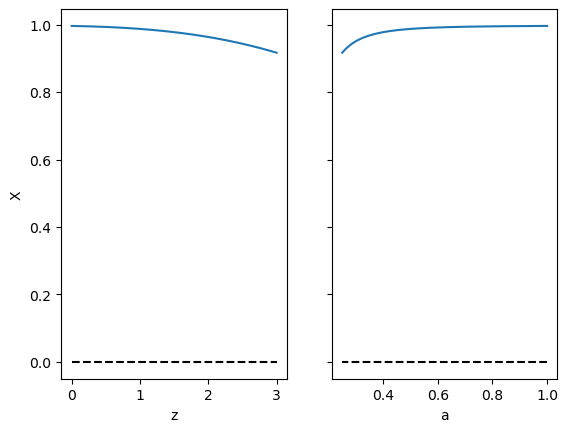

In [20]:
'''Plots of X(z): negative alpha'''

cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-3, 0]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(z,X(z , cosmo))
ax1.plot(z, np.zeros(len(z)), "--", color ="black")
ax2.plot(a,X((1/a) - 1,cosmo))
ax2.plot(a, np.zeros(len(a)), "--", color ="black")


ax1.set_ylabel('X')
ax1.set_xlabel('z')
ax2.set_xlabel('a')

plt.show()

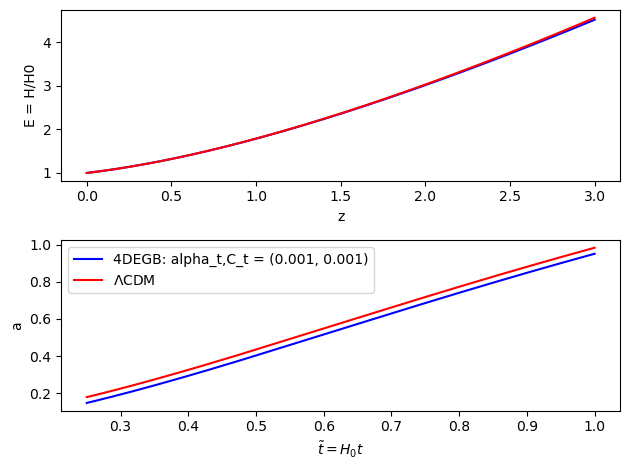

In [21]:
'''Plots of E(z)'''


cosmo = [0.27 , 0.045 , 0 , 9.2e-5, 1e-3, 1e-3]

f, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(z,E(z , cosmo), color = "b", label = r"4DEGB: alpha_t, C_t = {}".format((cosmo[-2],cosmo[-1])))
ax1.plot(z,E(z , cosmoLCDM), color = "r", label = r"$\Lambda$CDM")

ax2.plot(a,unitless_time(z , cosmoLCDM), color = "b", label = r"4DEGB: alpha_t,C_t = {}".format((cosmo[-2],cosmo[-1])))

ax2.plot(a,unitless_time(z , cosmo), color = "r", label = r"$\Lambda$CDM")
    
ax1.set_ylabel('E = H/H0')
ax1.set_xlabel('z')
ax2.set_ylabel('a')
ax2.set_xlabel(r'$\tilde{t} = H_0 t$')

f.tight_layout()

plt.legend()
plt.show()

In [22]:
funct = (alpha_tilde*(E((1/a) - 1,cosmo)) **4 - (1 - 0.27 - 0.045 - 0 - 9.2e-5 + alpha_tilde))
plt.plot(z, funct)
plt.plot(z, np.zeros(len(a)))

#plt.ylim(-1,10)
plt.xlabel("z")
plt.ylabel("Function to understand where singularity is in DE EoS")

plt.show()

NameError: name 'alpha_tilde' is not defined

/tmp/ipykernel_71599/3994524517.py:29: RuntimeWarning: invalid value encountered in sqrt
  ans = np.sqrt((np.sqrt(X(z , cosmo)) - 1 + (2 * alpha_tilde * Omega_k * (1+z) ** 2))/(2 * alpha_tilde))


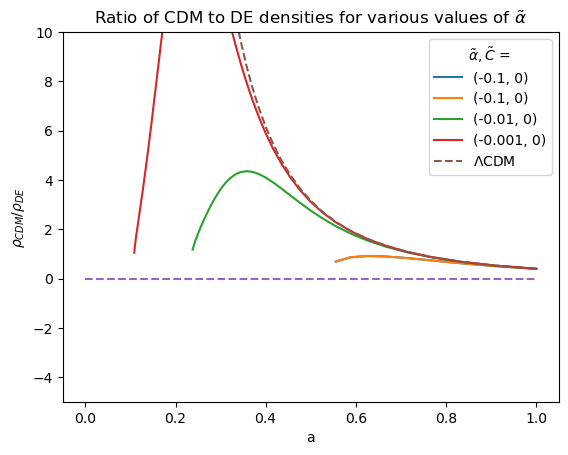

In [10]:
""" Plot FIG 1 Wang and Mota"""

cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-1, 0]
plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo), label = (cosmo[-2], cosmo[-1]))

cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-1, 0]
plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo), label = (cosmo[-2], cosmo[-1]))

cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-2, 0]
plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo), label = (cosmo[-2], cosmo[-1]))

cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-3, 0]
plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo), label = (cosmo[-2], cosmo[-1]))
    
plt.plot(np.linspace(0.0,1,int(1e2)), np.zeros(int(1e2)), "--")

plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmoLCDM), "--", label = "$\Lambda$CDM")

#plt.xlim(0.2,1)
plt.ylim(-5,10)
plt.xlabel("a")
plt.ylabel(r"$ \rho_{CDM} / \rho_{DE} $")
plt.legend(title = r"$ \~\alpha , \tilde{C} $ = ")
plt.title(r"Ratio of CDM to DE densities for various values of $\~\alpha$")
#plt.savefig('Fig1_WandM_modified.pdf')
plt.show()

/tmp/ipykernel_71599/3994524517.py:29: RuntimeWarning: invalid value encountered in sqrt
  ans = np.sqrt((np.sqrt(X(z , cosmo)) - 1 + (2 * alpha_tilde * Omega_k * (1+z) ** 2))/(2 * alpha_tilde))
/tmp/ipykernel_71599/3994524517.py:43: RuntimeWarning: invalid value encountered in sqrt
  (2 * E(z , cosmo) * np.sqrt(X(z , cosmo)))


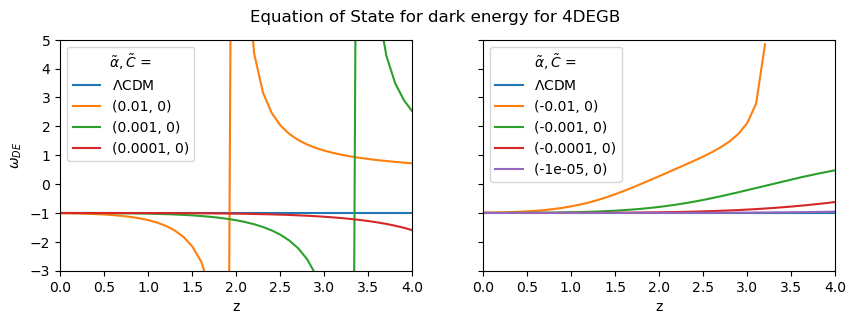

In [11]:
""" Plot FIG 2 Wang and Mota"""


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 3))

ax1.plot(z , omega_de(z , cosmoLCDM), label = "$\Lambda$CDM")

cosmo = [0.27 , 0.045 , 0 , 9.2e-5, 1e-2, 0]
ax1.plot(z , omega_de(z , cosmo), label = (cosmo[-2], cosmo[-1]))
cosmo = [0.27 , 0.045 , 0 , 9.2e-5, 1e-3, 0]
ax1.plot(z , omega_de(z , cosmo), label = (cosmo[-2], cosmo[-1]))
cosmo = [0.27 , 0.045 , 0 , 9.2e-5, 1e-4, 0]
ax1.plot(z , omega_de(z , cosmo), label = (cosmo[-2], cosmo[-1]))


ax2.plot(z , omega_de(z , cosmoLCDM), label = "$\Lambda$CDM")
cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-2, 0]
ax2.plot(z , omega_de(z , cosmo), label = (cosmo[-2], cosmo[-1]))
cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-3, 0]
ax2.plot(z , omega_de(z , cosmo), label = (cosmo[-2], cosmo[-1]))
cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-4, 0]
ax2.plot(z , omega_de(z , cosmo), label = (cosmo[-2], cosmo[-1]))
cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-5, 0]
ax2.plot(z , omega_de(z , cosmo), label = (cosmo[-2], cosmo[-1]))


ax1.set_xlim(0,4)
ax1.set_ylim(-3,5)
ax1.set_xlabel("z")
ax1.set_ylabel(r"$ \omega_{DE} $")
ax2.set_xlim(0,4)
ax2.set_xlabel("z")
ax1.legend(title = r"$ \~\alpha, \tilde{C} $ = ")
ax2.legend(title = r"$ \~\alpha, \tilde{C} $ = ")

f.suptitle("Equation of State for dark energy for 4DEGB")

#plt.savefig('Fig2_WandM_modified.pdf')
plt.show()

/tmp/ipykernel_71599/3994524517.py:29: RuntimeWarning: invalid value encountered in sqrt
  ans = np.sqrt((np.sqrt(X(z , cosmo)) - 1 + (2 * alpha_tilde * Omega_k * (1+z) ** 2))/(2 * alpha_tilde))
/tmp/ipykernel_71599/3994524517.py:43: RuntimeWarning: invalid value encountered in sqrt
  (2 * E(z , cosmo) * np.sqrt(X(z , cosmo)))


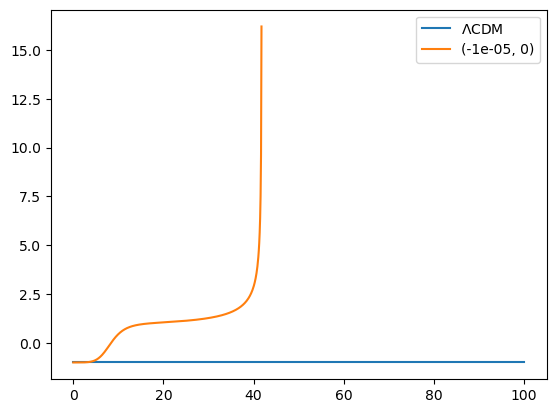

In [12]:
plt.plot(z , omega_de(z , cosmoLCDM), label = "$\Lambda$CDM")
cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-5, 0]
plt.plot(z , omega_de(z , cosmo), label = (cosmo[-2], cosmo[-1]))

plt.legend()

/tmp/ipykernel_71599/3994524517.py:29: RuntimeWarning: invalid value encountered in sqrt
  ans = np.sqrt((np.sqrt(X(z , cosmo)) - 1 + (2 * alpha_tilde * Omega_k * (1+z) ** 2))/(2 * alpha_tilde))


Text(0, 0.5, '~$\\rho_{DE}$')

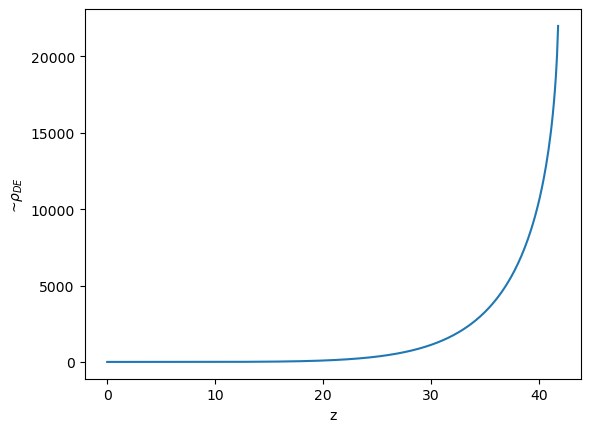

In [13]:
# Plot something proportional to rho_DE

def rho_DE_propto(z,cosmo):
    Omega_c , Omega_b , Omega_k , Omega_r, alpha_tilde, C_t = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = Omega_Lambda(cosmo)
    
    return (Omega_lambda - alpha_tilde*( E(z, cosmo) ** 4 \
            - 2 * Omega_k *  E(z, cosmo) ** 2 * (1 + z) ** 2))
plt.plot(z, rho_DE_propto(z,cosmo))
plt.xlabel("z")
plt.ylabel(r"~$\rho_{DE}$")

/tmp/ipykernel_71599/3994524517.py:29: RuntimeWarning: invalid value encountered in sqrt
  ans = np.sqrt((np.sqrt(X(z , cosmo)) - 1 + (2 * alpha_tilde * Omega_k * (1+z) ** 2))/(2 * alpha_tilde))
/tmp/ipykernel_71599/3994524517.py:43: RuntimeWarning: invalid value encountered in sqrt
  (2 * E(z , cosmo) * np.sqrt(X(z , cosmo)))


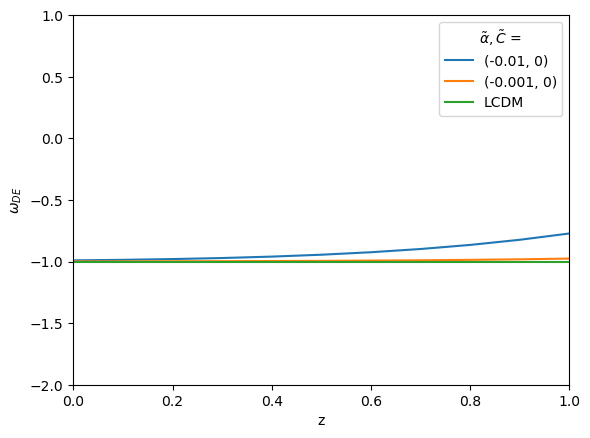

In [14]:
""" Plot FIG 2 Wang and Mota"""

cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-2, 0]
plt.plot(z , omega_de(z , cosmo), label = (cosmo[-2], cosmo[-1]))
cosmo = [0.27 , 0.045 , 0 , 9.2e-5, -1e-3, 0]
plt.plot(z , omega_de(z , cosmo), label = (cosmo[-2], cosmo[-1]))

plt.plot(z , omega_de(z , cosmoLCDM), label = "LCDM")

plt.xlim(0,1)
plt.ylim(-2,1)
plt.xlabel("z")
plt.ylabel(r"$ \omega_{DE} $")
plt.legend(title = r"$ \~\alpha, \tilde{C} $ = ")
plt.show()